In [1]:
import numpy as np
import pandas as pd

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
ftrs = pd.read_csv('./data/logistic_x.txt',sep = '\ +',header = None,engine = 'python',
                         names = ['x1','x2'])
ftrs

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315
...,...,...
94,4.774854,0.099415
95,5.827485,-0.690058
96,2.289474,1.970760
97,2.494152,1.415205


In [5]:
lbl = pd.read_csv('./data/logistic_y.txt',sep = '/ ',header = None, engine = 'python',names = ['label'])
lbl

,label
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
94,1.0
95,1.0
96,1.0
97,1.0


In [6]:
aug_df = pd.merge(left = ftrs, right=lbl,how = 'inner', left_index=True,right_index=True)
aug_df.head()

,x1,x2,label
0,1.343250,-1.331148,-1.0
1,1.820553,-0.634668,-1.0
2,0.986321,-1.888576,-1.0
3,1.944373,-1.635452,-1.0
4,0.976734,-1.353315,-1.0


<IPython.core.display.Javascript object>


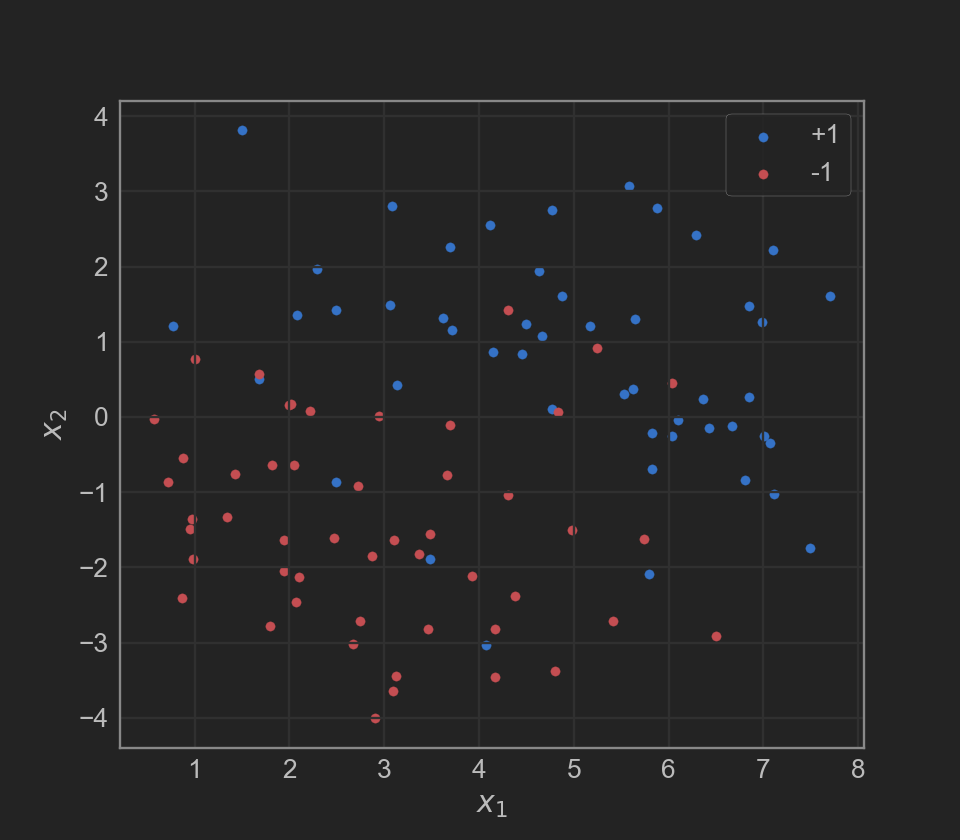

In [7]:
fig,ax = plt.subplots()

In [8]:
aug_df[aug_df['label']==1].plot(x = 'x1',y = 'x2',kind = 'scatter',ax = ax, label = '+1',c = 'b')

<AxesSubplot:xlabel='x1', ylabel='x2'>

<IPython.core.display.Javascript object>


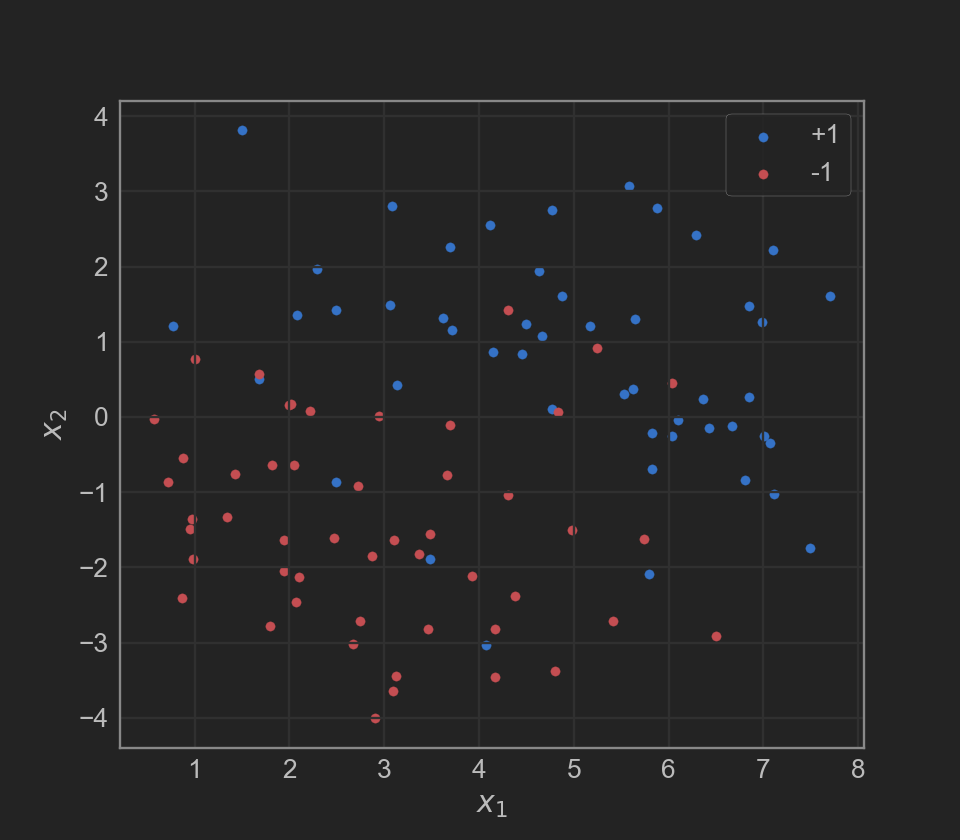

In [9]:
aug_df[aug_df['label']==-1].plot.scatter(x = 'x1',y = 'x2', c = 'r',ax = ax,label = '-1')
fig

In [10]:
ax.set_xlabel('$x{_1}$')
ax.set_ylabel('$x{_2}$')

Text(0, 0.5, '$x{_2}$')

In [11]:

# while n_iters < 1 # for debugging

In [14]:
#%%timeit -n 100
all_thetas = [] # collect for demonstration purpose
X = np.hstack([np.ones((ftrs.shape[0],1)),ftrs.values])
y = lbl.values
theta = np.zeros((X.shape[1],1))
tol = 1e9
n_iters = 0
while tol > 1e-06:
    z = (y * X.dot(theta))
    gz = 1/(1 + np.exp(-z))
    m,n = (X.shape)
    grad = X.T.dot((gz-1) * y)/m
    hess = X.T.dot(X * gz * (1-gz))/m
    
            
    delta = np.linalg.pinv(hess).dot(grad)
    old_theta = theta.copy()
    theta = theta - delta
    all_thetas.append(theta.T.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
#print('converged after {0} iterations'.format(n_iters))
#_=[print(row) for row in all_thetas]

1.61 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
_x = np.linspace(X[:,1].min(),X[:,1].max(),100).reshape(-1,1)
_xp = np.hstack((np.ones((_x.shape[0],1)),_x))
_y = -(_xp.dot(theta[:-1])/theta[-1])

In [19]:
theta[-1]

array([1.17194674])

<IPython.core.display.Javascript object>


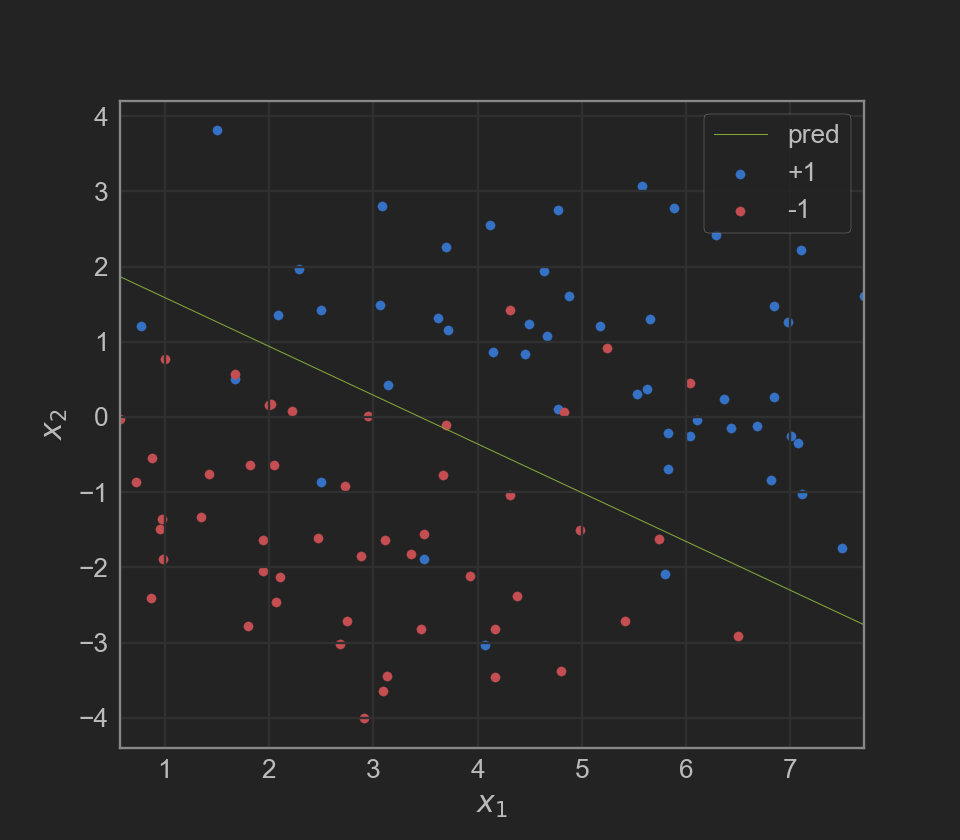

In [20]:
fig

In [25]:
ax.plot(_x,_y,lw = 0.5,label = 'pred')
ax.set_xlim(_x.min(),_x.max())

(0.57079941, 7.705400599999999)

In [26]:
plt.legend()